#Clustering Menggunakan Algoritma DBSCAN (dengan Parameter Manual)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah clustering dengan menggunakan algoritma DBSCAN yang bertujuan untuk memahami karakter customer pada e-commerce XYZ.

Parameter algoritma yang digunakan yaitu parameter manual (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu Skema 2-9.


Fitur yang dipakai adalah 3 fitur yang paling berkolerasi satu sama lain yaitu:

1. OrderCount
2. CouponUsed
3. HourSpendOnApp


In [ ]:
#Data Loading

import pandas as pd

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['OrderCount', 'CouponUsed', 'HourSpendOnApp']]
df

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,1.0,NaN
...,...,...,...
5625,2.0,1.0,3.0
5626,2.0,1.0,3.0
5627,2.0,1.0,3.0
5628,2.0,2.0,4.0


In [ ]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      5372 non-null   float64
 1   CouponUsed      5374 non-null   float64
 2   HourSpendOnApp  5375 non-null   float64
dtypes: float64(3)
memory usage: 132.1 KB


In [ ]:
#Handling Missing Values
import numpy as np

df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)
df.reset_index()
df = pd.concat([df], ignore_index=True)

<ipython-input-112-cef5e865a2ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4861 non-null   float64
 1   CouponUsed      4861 non-null   float64
 2   HourSpendOnApp  4861 non-null   float64
dtypes: float64(3)
memory usage: 114.1 KB


<Axes: >

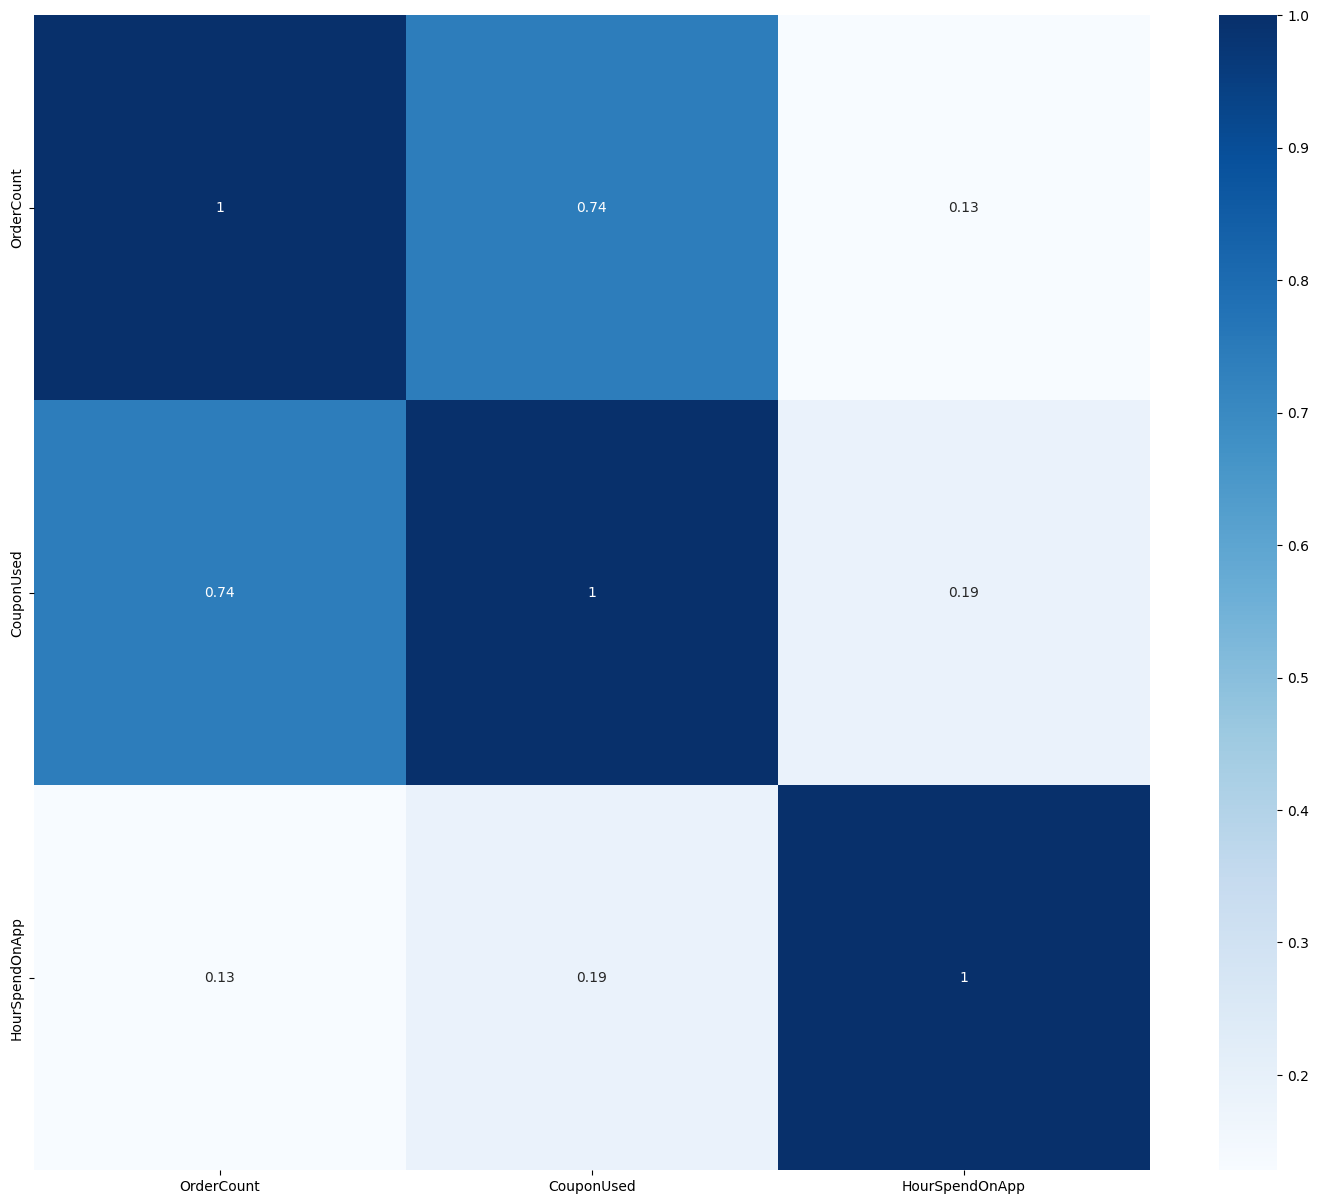

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X_train = df[['HourSpendOnApp', 'CouponUsed', 'OrderCount']]

In [ ]:
#Compute DBSCAN on Skema 2
#eps = 1
#min_samples = 5
#metric = 'euclidean'

clustering2 = DBSCAN(eps=1, min_samples=5, metric='euclidean').fit(X_train)
DBSCAN_dataset2 = X_train.copy()
DBSCAN_dataset2.loc[:,'Cluster'] = clustering2.labels_

In [ ]:
DBSCAN_dataset2.Cluster.value_counts().to_frame()

,Cluster
0,4801
-1,36
4,7
1,6
3,6
2,5


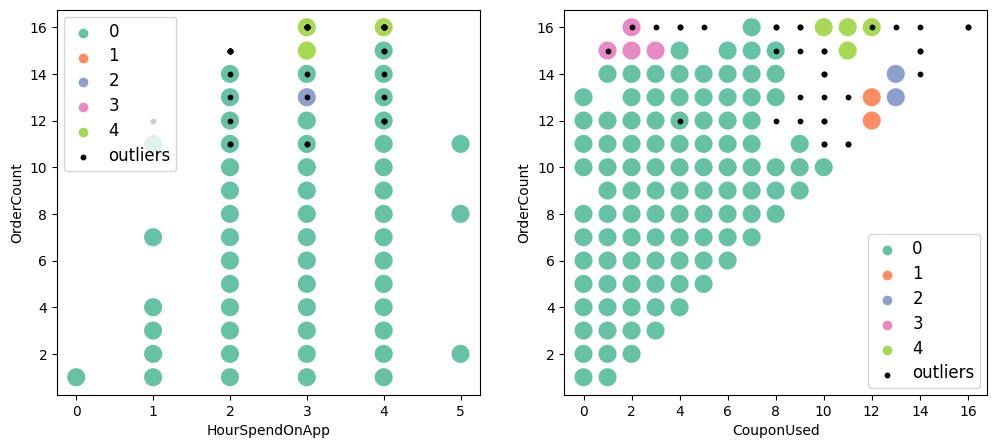

In [ ]:
outliers2 = DBSCAN_dataset2[DBSCAN_dataset2['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset2[DBSCAN_dataset2['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset2[DBSCAN_dataset2['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers2['HourSpendOnApp'], outliers2['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers2['CouponUsed'], outliers2['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [ ]:
n_clusters_2 = len(set(clustering2.labels_)) - (1 if -1 in clustering2.labels_ else 0)
print('Estimated number of clusters in Skema 2: %d' % n_clusters_2)

Estimated number of clusters in Skema 2: 5


In [ ]:
print("Silhouette Coefficient in Skema 2: %0.5f"
      % metrics.silhouette_score(X_train, clustering2.labels_))

Silhouette Coefficient in Skema 2: 0.68130


In [ ]:
#Compute DBSCAN on Skema 3
#eps = 1
#min_samples = 5
#metric = 'manhattan'

clustering3 = DBSCAN(eps=1, min_samples=5, metric='manhattan').fit(X_train)
DBSCAN_dataset3 = X_train.copy()
DBSCAN_dataset3.loc[:,'Cluster'] = clustering3.labels_

In [ ]:
DBSCAN_dataset3.Cluster.value_counts().to_frame()

,Cluster
0,4801
-1,36
4,7
1,6
3,6
2,5


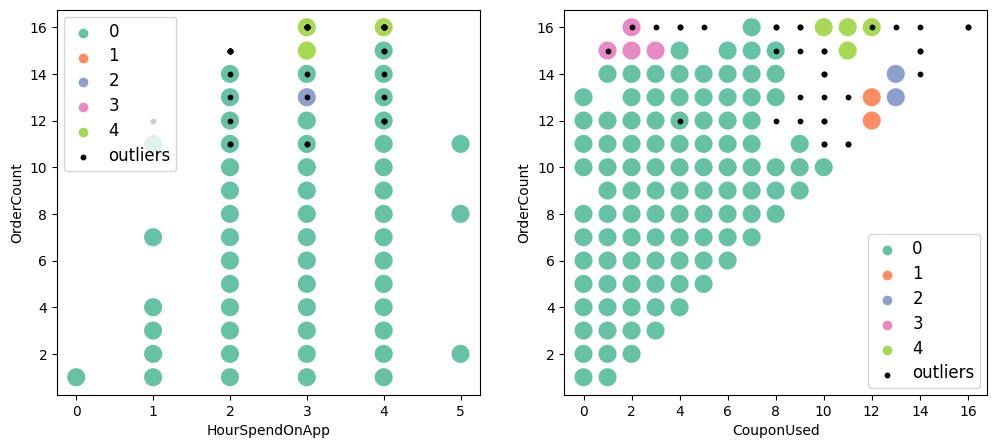

In [ ]:
outliers3 = DBSCAN_dataset3[DBSCAN_dataset3['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset3[DBSCAN_dataset3['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset3[DBSCAN_dataset3['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers3['HourSpendOnApp'], outliers3['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers3['CouponUsed'], outliers3['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [ ]:
n_clusters_3 = len(set(clustering3.labels_)) - (1 if -1 in clustering3.labels_ else 0)
print('Estimated number of clusters in Skema 3: %d' % n_clusters_3)

Estimated number of clusters in Skema 3: 5


In [ ]:
print("Silhouette Coefficient in Skema 3: %0.5f"
      % metrics.silhouette_score(X_train, clustering3.labels_))

Silhouette Coefficient in Skema 3: 0.68130


In [ ]:
#Compute DBSCAN on Skema 4
#eps = 1.5
#min_samples = 5
#metric = 'euclidean'

clustering4 = DBSCAN(eps=1.5, min_samples=5, metric='euclidean').fit(X_train)
DBSCAN_dataset4 = X_train.copy()
DBSCAN_dataset4.loc[:,'Cluster'] = clustering4.labels_

In [ ]:
DBSCAN_dataset4.Cluster.value_counts().to_frame()

,Cluster
0,4859
-1,2


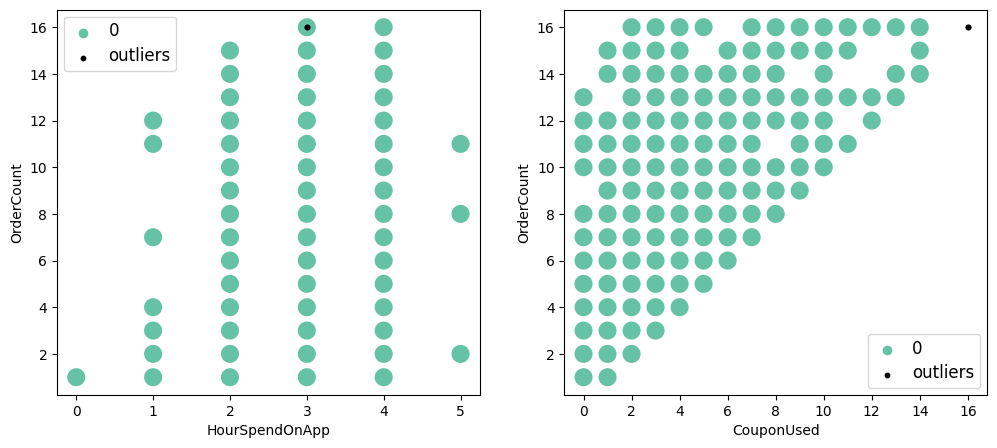

In [ ]:
outliers4 = DBSCAN_dataset4[DBSCAN_dataset4['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset4[DBSCAN_dataset4['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset4[DBSCAN_dataset4['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers4['HourSpendOnApp'], outliers4['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers4['CouponUsed'], outliers4['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [ ]:
n_clusters_4 = len(set(clustering4.labels_)) - (1 if -1 in clustering4.labels_ else 0)
print('Estimated number of clusters in Skema 4: %d' % n_clusters_4)

Estimated number of clusters in Skema 4: 1


In [ ]:
print("Silhouette Coefficient in Skema 4: %0.5f"
      % metrics.silhouette_score(X_train, clustering4.labels_))

Silhouette Coefficient in Skema 4: 0.79197


In [ ]:
#Compute DBSCAN on Skema 5
#eps = 1.5
#min_samples = 5
#metric = 'manhattan'

clustering5 = DBSCAN(eps=1.5, min_samples=5, metric='manhattan').fit(X_train)
DBSCAN_dataset5 = X_train.copy()
DBSCAN_dataset5.loc[:,'Cluster'] = clustering5.labels_

In [ ]:
DBSCAN_dataset5.Cluster.value_counts().to_frame()

,Cluster
0,4801
-1,36
4,7
1,6
3,6
2,5


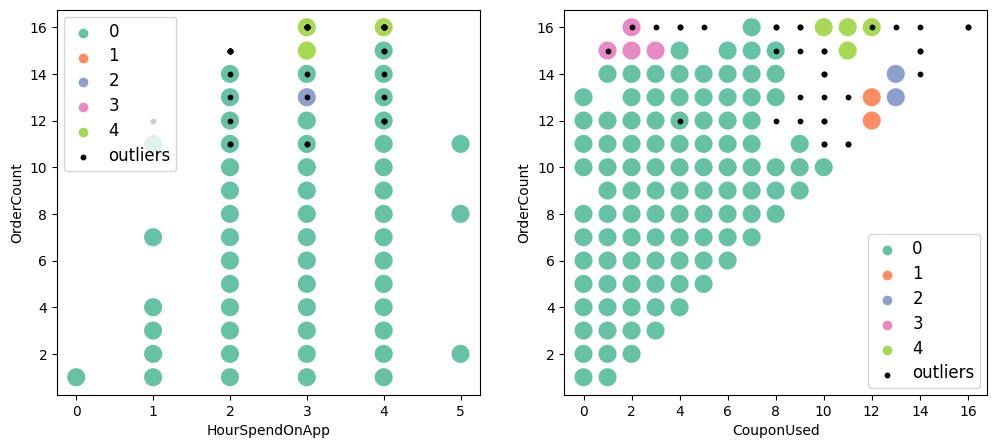

In [ ]:
outliers5 = DBSCAN_dataset5[DBSCAN_dataset5['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset5[DBSCAN_dataset5['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset5[DBSCAN_dataset5['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers5['HourSpendOnApp'], outliers5['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers5['CouponUsed'], outliers5['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [ ]:
n_clusters_5 = len(set(clustering5.labels_)) - (1 if -1 in clustering5.labels_ else 0)
print('Estimated number of clusters in Skema 5: %d' % n_clusters_5)

Estimated number of clusters in Skema 5: 5


In [ ]:
print("Silhouette Coefficient in Skema 5: %0.5f"
      % metrics.silhouette_score(X_train, clustering5.labels_))

Silhouette Coefficient in Skema 5: 0.68130


In [ ]:
#Compute DBSCAN on Skema 6
#eps = 1
#min_samples = 10
#metric = 'euclidean'

clustering6 = DBSCAN(eps=1, min_samples=10, metric='euclidean').fit(X_train)
DBSCAN_dataset6 = X_train.copy()
DBSCAN_dataset6.loc[:,'Cluster'] = clustering6.labels_

In [ ]:
DBSCAN_dataset6.Cluster.value_counts().to_frame()

,Cluster
0,4770
-1,91


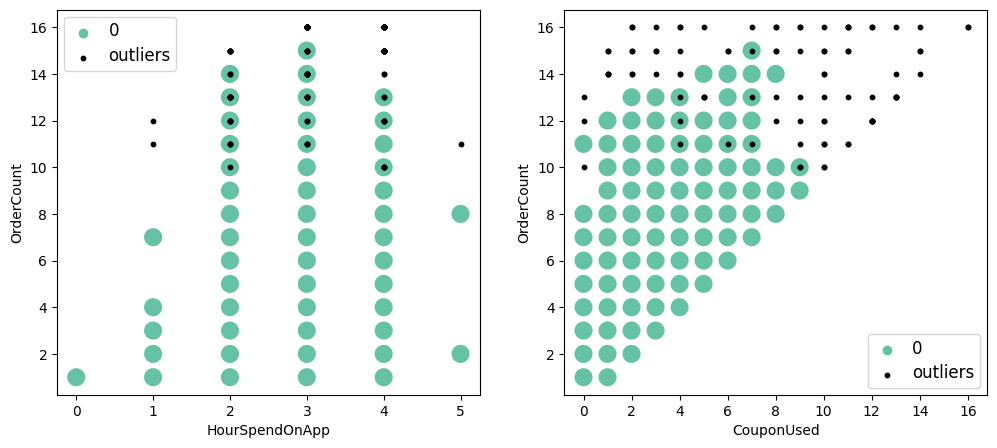

In [ ]:
outliers6 = DBSCAN_dataset6[DBSCAN_dataset6['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset6[DBSCAN_dataset6['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset6[DBSCAN_dataset6['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers6['HourSpendOnApp'], outliers6['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers6['CouponUsed'], outliers6['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [ ]:
n_clusters_6 = len(set(clustering6.labels_)) - (1 if -1 in clustering6.labels_ else 0)
print('Estimated number of clusters in Skema 6: %d' % n_clusters_6)

Estimated number of clusters in Skema 6: 1


In [ ]:
print("Silhouette Coefficient in Skema 6: %0.5f"
      % metrics.silhouette_score(X_train, clustering6.labels_))

Silhouette Coefficient in Skema 6: 0.72256


In [ ]:
#Compute DBSCAN on Skema 7
#eps = 1
#min_samples = 10
#metric = 'manhattan'

clustering7 = DBSCAN(eps=1, min_samples=10, metric='manhattan').fit(X_train)
DBSCAN_dataset7 = X_train.copy()
DBSCAN_dataset7.loc[:,'Cluster'] = clustering7.labels_

In [ ]:
DBSCAN_dataset7.Cluster.value_counts().to_frame()

,Cluster
0,4770
-1,91


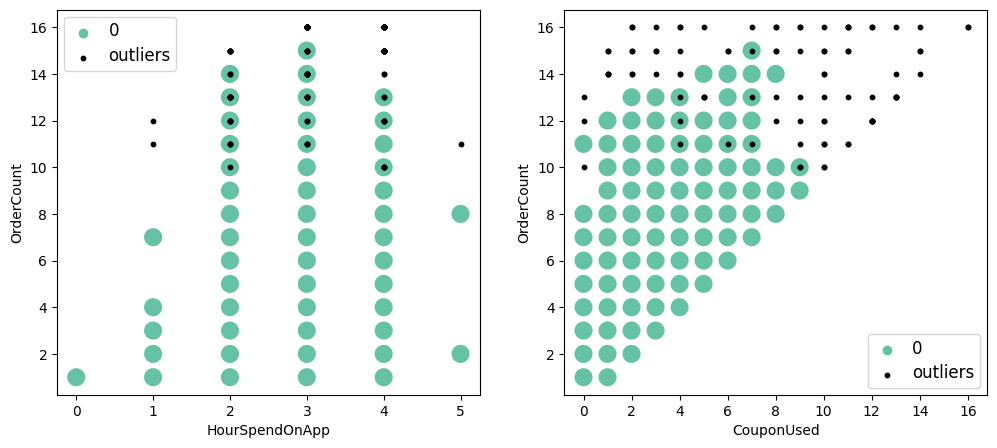

In [ ]:
outliers7 = DBSCAN_dataset7[DBSCAN_dataset7['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset7[DBSCAN_dataset7['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset7[DBSCAN_dataset7['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers7['HourSpendOnApp'], outliers7['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers7['CouponUsed'], outliers7['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()


In [ ]:
n_clusters_7 = len(set(clustering7.labels_)) - (1 if -1 in clustering7.labels_ else 0)
print('Estimated number of clusters in Skema 7: %d' % n_clusters_7)

Estimated number of clusters in Skema 7: 1


In [ ]:
print("Silhouette Coefficient in Skema 7: %0.5f"
      % metrics.silhouette_score(X_train, clustering7.labels_))

Silhouette Coefficient in Skema 7: 0.72256


In [146]:
#Compute DBSCAN on Skema 8
#eps = 1.5
#min_samples = 10
#metric = 'euclidean'

clustering8 = DBSCAN(eps=1.5, min_samples=10, metric='euclidean').fit(X_train)
DBSCAN_dataset8 = X_train.copy()
DBSCAN_dataset8.loc[:,'Cluster'] = clustering8.labels_

In [147]:
DBSCAN_dataset8.Cluster.value_counts().to_frame()

,Cluster
0,4823
-1,18
1,11
2,9


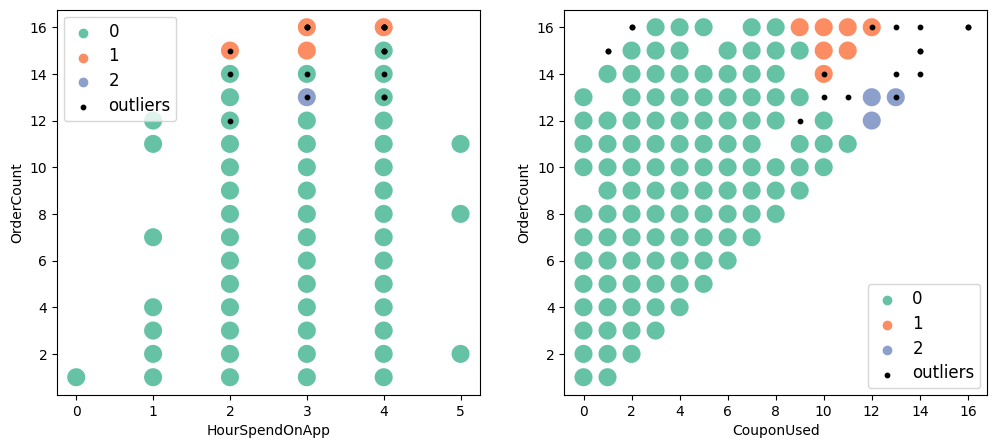

In [148]:
outliers8 = DBSCAN_dataset8[DBSCAN_dataset8['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset8[DBSCAN_dataset8['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset8[DBSCAN_dataset8['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers8['HourSpendOnApp'], outliers8['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers8['CouponUsed'], outliers8['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

In [149]:
n_clusters_8 = len(set(clustering8.labels_)) - (1 if -1 in clustering8.labels_ else 0)
print('Estimated number of clusters in Skema 8: %d' % n_clusters_8)

Estimated number of clusters in Skema 8: 3


In [150]:
print("Silhouette Coefficient in Skema 8: %0.5f"
      % metrics.silhouette_score(X_train, clustering8.labels_))

Silhouette Coefficient in Skema 8: 0.72247


In [151]:
#Compute DBSCAN on Skema 9
#eps = 1.5
#min_samples = 10
#metric = 'manhattan'


clustering9 = DBSCAN(eps=1.5, min_samples=10, metric='manhattan').fit(X_train)
DBSCAN_dataset9 = X_train.copy()
DBSCAN_dataset9.loc[:,'Cluster'] = clustering9.labels_


In [152]:
DBSCAN_dataset9.Cluster.value_counts().to_frame()

,Cluster
0,4770
-1,91


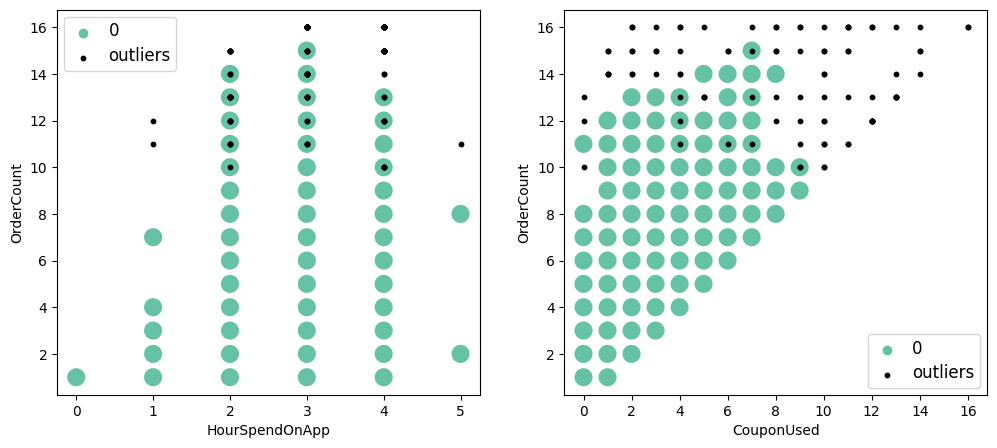

In [153]:
outliers9 = DBSCAN_dataset9[DBSCAN_dataset9['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='HourSpendOnApp', y='OrderCount',

                data=DBSCAN_dataset9[DBSCAN_dataset9['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='CouponUsed', y='OrderCount',

                data=DBSCAN_dataset9[DBSCAN_dataset9['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers9['HourSpendOnApp'], outliers9['OrderCount'], s=10, label='outliers', c="k")

axes[1].scatter(outliers9['CouponUsed'], outliers9['OrderCount'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()


In [156]:
n_clusters_9 = len(set(clustering9.labels_)) - (1 if -1 in clustering9.labels_ else 0)
print('Estimated number of clusters in Skema 9: %d' % n_clusters_9)


Estimated number of clusters in Skema 9: 1


In [157]:
print("Silhouette Coefficient in Skema 9: %0.5f"
      % metrics.silhouette_score(X_train, clustering9.labels_))

Silhouette Coefficient in Skema 9: 0.72256
